In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install teeplot
from teeplot import teeplot as tp


# OSF identifier
data_id = "v3ec9"

# load CSV file into DataFrame directly from OSF URL
df = pd.read_csv(f"https://osf.io/{data_id}/download")


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


teeplots/viz=plot-mean-real-execution-time+ext=.pdf
teeplots/viz=plot-mean-real-execution-time+ext=.png


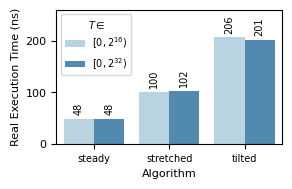

In [2]:
def plot_mean_real_execution_time(data):

    # rename the numeric T Upper Bounds
    data["T Upper Bound"] = data["T Upper Bound"].replace({
        65536: r"$[0, 2^{16})$",
        4294967296: r"$[0, 2^{32})$"
    })

    # Rename the algorithm labels
    data["Algorithm"] = data["Algorithm"].replace({
        "steady_lookup_ingest_times_batched": "steady",
        "stretched_lookup_ingest_times_batched": "stretched",
        "tilted_lookup_ingest_times_batched": "tilted"
    })

    # convert to microseconds per site
    data["Real Time Per Site (ns)"] = (data["Real Execution Time"] * 1e9) / (data["Surface Size (S)"] * data["T Size"])

    # group by Algorithm and T Upper Bound, compute the mean per-site time
    grouped = data.groupby(["Algorithm", "T Upper Bound"], as_index=False)["Real Time Per Site (ns)"].mean()

    # bar plot
    plt.figure(figsize=(3, 2)) # these are IRL dimensions

    # more bar plot
    ax = sns.barplot(data=grouped, x="Algorithm", y="Real Time Per Site (ns)", hue="T Upper Bound", palette="Paired", alpha=0.85)

    # Add labels to each bar
    for container in ax.containers:
        labels = [f"{int(v.get_height())}" if v.get_height() > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, fmt='%d', fontsize=7, padding=3, rotation=90)

    # better readability
    plt.xlabel("Algorithm", fontsize=8)
    plt.ylabel("Real Execution Time (ns)", fontsize=8)

    # keep x-axis labels horizontal
    plt.xticks(fontsize=7, rotation=0, ha='center')
    plt.yticks(fontsize=8)

    # ylim
    ax.set_ylim(0, ax.get_ylim()[1] * 1.2)

    # legend
    plt.legend(title=r"$T \in$", title_fontsize=7, fontsize=7, loc="upper left")

    # layout tweaks
    plt.subplots_adjust(bottom=0.4)
    plt.tight_layout(pad=1)


# teeplot
tp.tee(plot_mean_real_execution_time, data=df)
